# ML AAT: Animal Classification

### Classifying Animals and their biological class or type such as mammals,amphibian, etc based on the given dataset

In [94]:
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix 
from sklearn import metrics

In [60]:
data= pd.read_csv("/Users/sherazhasan/Desktop/ML_projects/ML_AAT/class.csv")

### Load Data


In [61]:
class_df = pd.read_csv("/Users/sherazhasan/Desktop/ML_projects/ML_AAT/class.csv")
train_df = pd.read_csv("/Users/sherazhasan/Desktop/ML_projects/ML_AAT/zoo.csv")

In [62]:
y = train_df.iloc[:, -1]

# Drop the first and last column from X
X = train_df.iloc[:, 1:-1]

# Calculate the correlation between each independent variable and the dependent variable
correlations = {}
for column in X.columns:
    correlation = X[column].corr(y,method='spearman')
    correlations[column] = correlation


# Display the correlation values
for column, corr_value in correlations.items():
    print(f"Correlation between {column} and the dependent variable: {corr_value:.4f}")


Correlation between hair and the dependent variable: -0.8288
Correlation between feathers and the dependent variable: 0.1045
Correlation between eggs and the dependent variable: 0.8575
Correlation between milk and the dependent variable: -0.9225
Correlation between airborne and the dependent variable: 0.1620
Correlation between aquatic and the dependent variable: 0.4572
Correlation between predator and the dependent variable: 0.0145
Correlation between toothed and the dependent variable: -0.5377
Correlation between backbone and the dependent variable: -0.6189
Correlation between breathes and the dependent variable: -0.5069
Correlation between venomous and the dependent variable: 0.2979
Correlation between fins and the dependent variable: 0.2026
Correlation between legs and the dependent variable: -0.0793
Correlation between tail and the dependent variable: -0.4851
Correlation between domestic and the dependent variable: -0.1011
Correlation between catsize and the dependent variable: -0

### Handling Missing Values

In [95]:
missing_values_cdf = class_df.isnull().sum()
missing_values_tdf = train_df.isnull().sum()
#print(class_df.head())


if missing_values_tdf.sum() == 0:
    print("No missing values found in the training dataset.")
else:
    print("Missing values found in the training dataset.")
    
    if missing_values_cdf.sum() < 0.05 * len(class_df):  # If missing values are limited to a small number of records (5% threshold)
        print("Deleting records with missing values...")
        class_df.dropna(inplace=True)  
        print("Missing values deleted.")
    else:
        print("Imputing missing values...")
        class_df.fillna(class_df.mean(), inplace=True)
        print("Missing values imputed.")
    
    
#print(train_df.head())


No missing values found in the training dataset.


### Data Visualization

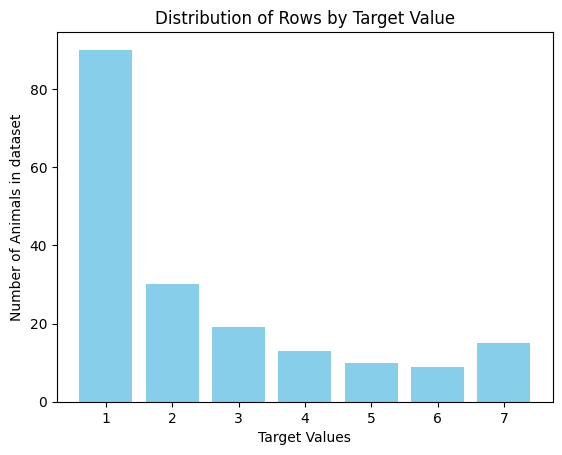

In [76]:
import matplotlib.pyplot as plt

target_counts = train_df['class_type'].value_counts().sort_index()

# Plotting
plt.bar(target_counts.index, target_counts.values, color='skyblue')
plt.xlabel('Target Values')
plt.ylabel('Number of Animals in dataset')
plt.title('Distribution of Rows by Target Value')
plt.xticks(range(1, 8))  
plt.show()


In [77]:
import plotly.express as px
labels = ["Mammal","Bird","Reptile","fish","Amphibian","Bug","Invertebrae"]
values = train_df['class_type'].value_counts().tolist()

px.pie(train_df, values=values, names=labels, title="Animal Class Type Distribution Pie Chart")


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Mammal', 'Bird', 'Reptile', 'fish', 'Amphibian', 'Bug', 'Invertebrae'],
                              dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([90, 30, 19, 15, 13, 10,  9])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Animal Class Type Distribution Pie Chart'}}
})

In [66]:
x = train_df.iloc[:, 1:17].values
x

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [67]:
y = train_df.iloc[:, 17].values
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 5, 5, 5, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3,
       3, 1, 1, 6, 7, 1, 2, 1, 1, 1, 1, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 3, 5, 2, 5])

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## K-Nearest Neighbour

In [14]:
scores = {}
slist = []

for i in range(1,10):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(x_train, y_train)
    y_pred_knn = model_knn.predict(x_test)
    scores[i] = metrics.accuracy_score(y_test, y_pred_knn)
    slist.append(metrics.accuracy_score(y_test, y_pred_knn))

scores


{1: 0.9787234042553191,
 2: 0.9574468085106383,
 3: 0.9574468085106383,
 4: 0.9574468085106383,
 5: 0.9361702127659575,
 6: 0.9148936170212766,
 7: 0.9148936170212766,
 8: 0.9361702127659575,
 9: 0.8936170212765957}

In [69]:
from sklearn.metrics import mean_squared_error as mse
distortion_scores = []
for i in range(1,10):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(x_train, y_train)
    y_pred_knn = model_knn.predict(x_test)
    
    distortion_scores.append(mse(y_test, y_pred_knn))
    
distortion_scores

[0.0851063829787234,
 0.10638297872340426,
 0.1702127659574468,
 0.1702127659574468,
 0.3617021276595745,
 0.3829787234042553,
 0.44680851063829785,
 0.3617021276595745,
 0.8936170212765957]

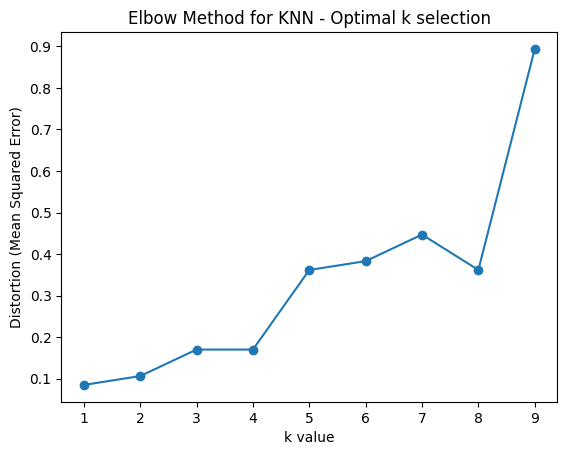

In [72]:
plt.plot(range(1,10), distortion_scores, marker='o')
plt.xlabel('k value')
plt.ylabel('Distortion (Mean Squared Error)')
plt.title('Elbow Method for KNN - Optimal k selection')
plt.show()

Calculating different accuracy scores for different k neares neighbour for different k values from 1 to 9 
Selecting k=4 to do as n_neighbours parameter

In [15]:

knn2 = KNeighborsClassifier(n_neighbors = 4)
knn2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [16]:
y_pred_knn = knn2.predict(x_test)

In [17]:
y_pred_knn

array([5, 1, 7, 1, 1, 1, 4, 3, 1, 4, 1, 1, 3, 1, 2, 6, 2, 1, 1, 1, 1, 2,
       2, 1, 5, 1, 1, 3, 1, 2, 1, 1, 7, 4, 1, 5, 5, 1, 1, 4, 5, 1, 4, 4,
       1, 6, 6])

In [18]:
y_pred_1 = knn2.predict(x_test[7].reshape(1, -1))
y_pred_1 # predict one value

array([3])

In [19]:
cr_knn = classification_report(y_test, y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         5
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         6
           5       0.60      1.00      0.75         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3

    accuracy                           0.96        47
   macro avg       0.94      0.92      0.92        47
weighted avg       0.97      0.96      0.96        47



In [20]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.9574468085106383


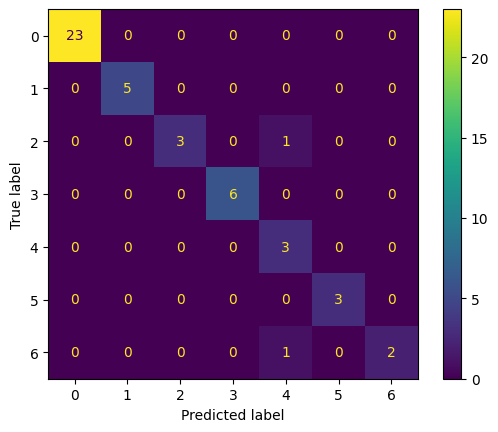

In [21]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn))
cm_display.plot()
plt.show()

## Decision Tree

In [22]:

clf = DecisionTreeClassifier()
#clf.get_params()
clf.fit(x_train, y_train)
y_pred_dt = clf.predict(x_test)

In [23]:
y_pred_dt

array([5, 1, 7, 1, 1, 1, 4, 3, 1, 4, 1, 1, 3, 1, 2, 6, 2, 1, 1, 1, 1, 2,
       2, 1, 7, 1, 1, 3, 1, 2, 1, 1, 7, 4, 1, 5, 5, 1, 1, 4, 5, 1, 4, 4,
       1, 6, 6])

In [24]:
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred_dt)}")

Accuracy = 0.9787234042553191


In [25]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         5
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         6
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.98        47
   macro avg       0.96      0.96      0.96        47
weighted avg       0.98      0.98      0.98        47



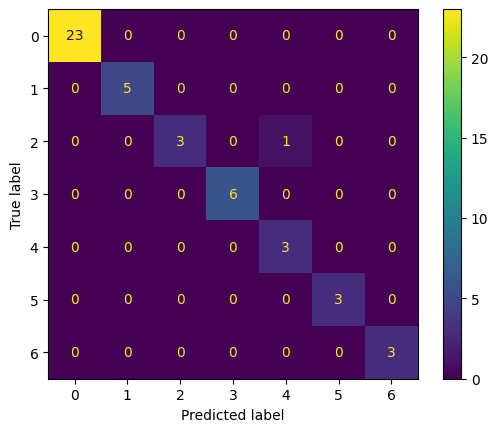

In [26]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_dt))
cm_display.plot()
plt.show()

In [27]:
y_pred_2 = clf.predict(x_test[7].reshape(1, -1))
y_pred_2 # predict one value

array([3])

### Decision Tree Visualization

In [28]:

feature_names = train_df.columns[1:17]
viz = train_df.copy()
viz["class_type"]=viz["class_type"].values.astype(str)
print(viz.dtypes)
target_names = viz['class_type'].unique().tolist()

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type     object
dtype: object


In [26]:
feature_names

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [27]:
target_names

['1', '4', '2', '7', '6', '5', '3']

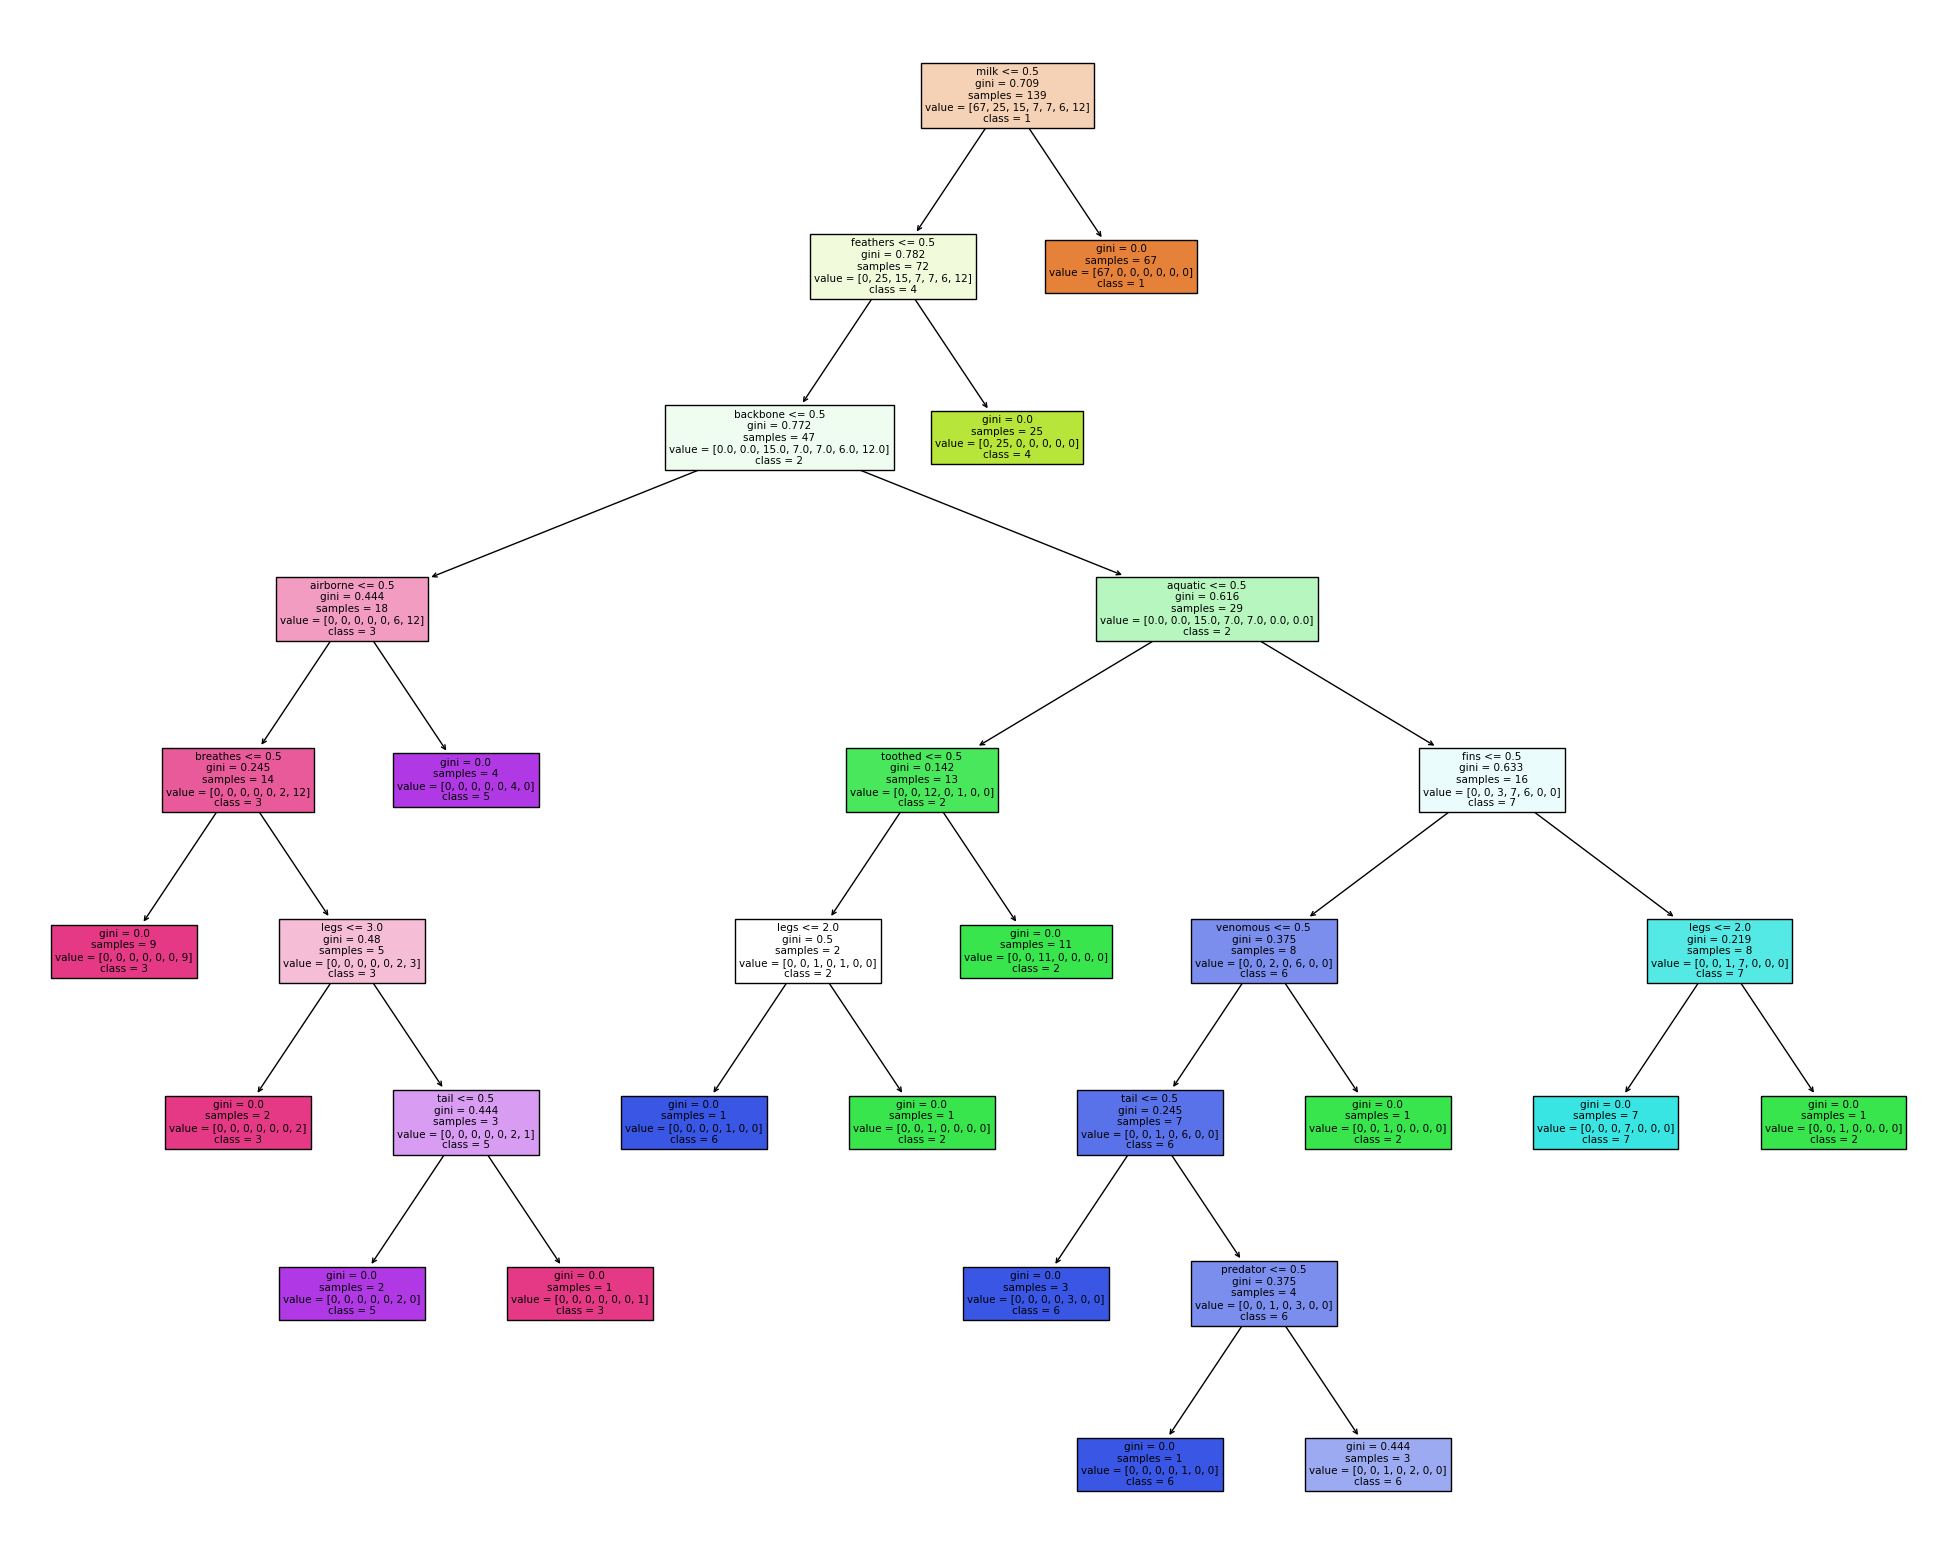

In [28]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(25, 20))
plot_tree(clf, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png') 

## Random Forest

In [29]:
model_rf = RandomForestClassifier(bootstrap= False, max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 40, criterion = 'entropy', random_state = 0) # best parameters from grid search
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

In [30]:
y_pred_rf

array([5, 1, 7, 1, 1, 1, 4, 3, 1, 4, 1, 1, 3, 1, 2, 6, 2, 1, 1, 1, 1, 2,
       2, 1, 7, 1, 1, 3, 1, 2, 1, 1, 7, 4, 1, 5, 5, 1, 1, 4, 5, 1, 4, 4,
       1, 6, 6])

In [31]:
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred_rf)}")

Accuracy = 0.9787234042553191


In [32]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         5
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         6
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.98        47
   macro avg       0.96      0.96      0.96        47
weighted avg       0.98      0.98      0.98        47



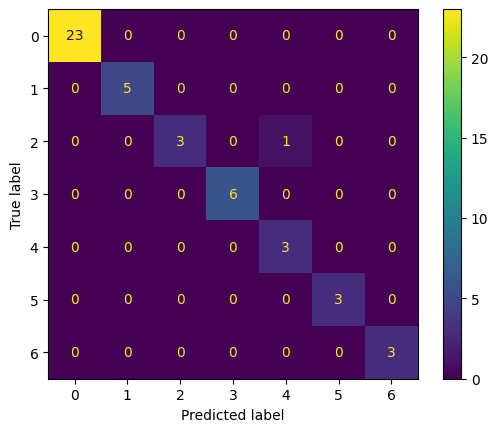

In [33]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_rf))
cm_display.plot()
plt.show()

In [34]:
y_pred_3 = model_rf.predict(x_test[7].reshape(1, -1))
y_pred_3 # predict one value

array([3])

### Random Forest Visualization

In [56]:
estimator = model_rf.estimators_[5]
estimator

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=1537364731)

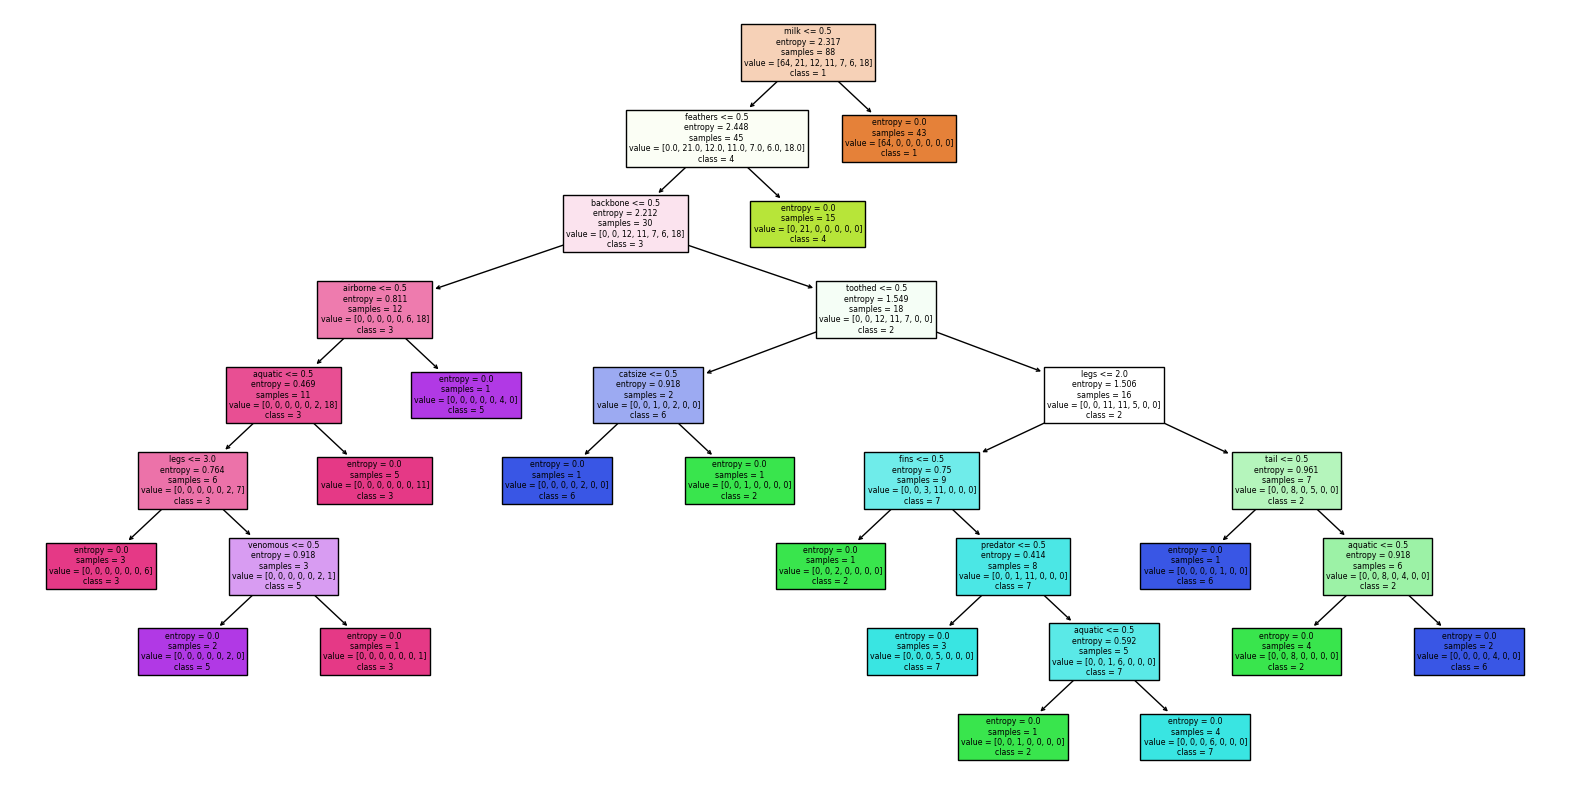

In [36]:
plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()


In [37]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


classifiers = [model_knn, clf, model_rf]
pred_values= [y_pred_knn,y_pred_dt,y_pred_rf]


# Perform cross-validation for each classifier
for classifier, y_pred in zip(classifiers, pred_values):
    # Create a KFold object with 10 folds
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Perform cross-validation
    scores = cross_val_score(classifier, x_train, y_train, cv=kf)
    
    # Calculate the average performance metrics
    avg_accuracy = np.mean(scores)
    avg_precision = precision_score(y_test, y_pred, average='weighted')
    avg_recall = recall_score(y_test, y_pred, average='weighted')
    avg_f1_score = f1_score(y_test, y_pred, average='weighted')
    
    # Print the average performance metrics
    print("Classifier: ", classifier.__class__.__name__)
    print("Average Accuracy: ", avg_accuracy)
    print("Average Precision: ", avg_precision)
    print("Average Recall: ", avg_recall)
    print("Average F1-Score: ", avg_f1_score)
    print("----------------------------------------")

Classifier:  KNeighborsClassifier
Average Accuracy:  0.8412087912087912
Average Precision:  0.9744680851063829
Average Recall:  0.9574468085106383
Average F1-Score:  0.9591185410334346
----------------------------------------
Classifier:  DecisionTreeClassifier
Average Accuracy:  0.9203296703296704
Average Precision:  0.9574468085106383
Average Recall:  0.9574468085106383
Average F1-Score:  0.9574468085106383
----------------------------------------
Classifier:  RandomForestClassifier
Average Accuracy:  0.9571428571428571
Average Precision:  0.9840425531914894
Average Recall:  0.9787234042553191
Average F1-Score:  0.9787234042553191
----------------------------------------


## Prediction Time

In [38]:
def preprocess_attributes():
    attributes_array = []
    # start_input= input(f"Enter yes or no for the following mentioned attributes of the type of animal you want to predict\n Enter yes to continue or no to exit ")
    # if(start_input.lower()== 'no'):
        
    
    # Ask user for each attribute individually
    hair = input("Does the animal have hair? (yes/no): ")
    attributes_array.append(1 if hair.lower() == 'yes' else 0)
    
    feathers = input("Does the animal have feathers? (yes/no): ")
    attributes_array.append(1 if feathers.lower() == 'yes' else 0)
    
    eggs = input("Does the animal lay eggs? (yes/no): ")
    attributes_array.append(1 if eggs.lower() == 'yes' else 0)
    
    milk = input("Does the animal produce milk? (yes/no): ")
    attributes_array.append(1 if milk.lower() == 'yes' else 0)
    
    airborne = input("Is the animal airborne? (yes/no): ")
    attributes_array.append(1 if airborne.lower() == 'yes' else 0)
    
    aquatic = input("Is the animal aquatic? (yes/no): ")
    attributes_array.append(1 if aquatic.lower() == 'yes' else 0)
    
    predator = input("Is the animal a predator? (yes/no): ")
    attributes_array.append(1 if predator.lower() == 'yes' else 0)
    
    toothed = input("Does the animal have teeth? (yes/no): ")
    attributes_array.append(1 if toothed.lower() == 'yes' else 0)
    
    backbone = input("Does the animal have a backbone? (yes/no): ")
    attributes_array.append(1 if backbone.lower() == 'yes' else 0)
    
    breathes = input("Does the animal breathe? (yes/no): ")
    attributes_array.append(1 if breathes.lower() == 'yes' else 0)
    
    venomous = input("Is the animal venomous? (yes/no): ")
    attributes_array.append(1 if venomous.lower() == 'yes' else 0)
    
    fins = input("Does the animal have fins? (yes/no): ")
    attributes_array.append(1 if fins.lower() == 'yes' else 0)
    
    legs = input("How many legs does the animal have?: ")
    attributes_array.append(int(legs))
    
    tail = input("Does the animal have a tail? (yes/no): ")
    attributes_array.append(1 if tail.lower() == 'yes' else 0)
    
    domestic = input("Is the animal domestic? (yes/no): ")
    attributes_array.append(1 if domestic.lower() == 'yes' else 0)
    
    catsize = input("Is the animal cat-sized? (yes/no): ")
    attributes_array.append(1 if catsize.lower() == 'yes' else 0)
    
    return attributes_array

In [35]:
# attributes_array = preprocess_attributes()

attributes_array=[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1]

In [36]:
print(attributes_array)

[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1]


In [38]:
def classify_animal_type(animal_type):
    # Define the cases and their corresponding animal types
    animal_types = {
        1: "Mammal",
        2: "Bird",
        3: "Reptile",
        4: "Fish",
        5: "Amphibian",
        6: "Bug",
        7: "Invertebrate"
    }
    
    # Print the animal type based on the input integer value
    print(animal_types.get(animal_type, "Unknown"))



### KNN Prediction

In [39]:
knn_pred_value = knn2.predict(np.array(attributes_array).reshape(1, -1))
knn_pred_value # predict one value
single_int_value = int(knn_pred_value[0]) # convert np array to single int value
classify_animal_type(int(knn_pred_value[0]))

Mammal


### Decision Tree Prediction

In [40]:
dt_pred_value = clf.predict(np.array(attributes_array).reshape(1, -1))
dt_pred_value # predict one value
single_int_value = int(dt_pred_value[0]) # convert np array to single int value
classify_animal_type(int(dt_pred_value[0]))


Mammal


### Random Forest prediction

In [41]:
rf_pred_value = model_rf.predict(np.array(attributes_array).reshape(1, -1))
rf_pred_value # predict one value
single_int_value = int(rf_pred_value[0]) # convert np array to single int value
classify_animal_type(int(rf_pred_value[0]))


Mammal


### Ensembling all the predictions

In [82]:
from sklearn.ensemble import  VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('knn', knn2),
    ('dt', clf),
    ('rf', model_rf)
], voting='hard')  

In [83]:
ensemble_model.fit(x_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=4)),
                             ('dt', DecisionTreeClassifier()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10,
                                                     random_state=0))])

In [84]:
y_pred = ensemble_model.predict(x_test)

In [85]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy:.5f}')

Ensemble Model Accuracy: 0.97872


In [86]:
y_pred_4 = ensemble_model.predict(x_test[7].reshape(1, -1))
y_pred_4 # predict one value

array([3])

In [87]:
ensemble_pred_value = ensemble_model.predict(np.array(attributes_array).reshape(1, -1))
ensemble_pred_value # predict one value
single_int_value = int(ensemble_pred_value[0]) # convert np array to single int value
classify_animal_type(int(ensemble_pred_value[0]))

Mammal


In [89]:
from joblib import dump

# Assuming random_forest_model is your trained Random Forest classifier
dump(model_rf, 'random_forest_model.joblib')
dump(model_knn, 'knn_model.joblib')
dump(clf, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

In [90]:
dump(ensemble_model,'ensemble_model.joblib')

['ensemble_model.joblib']